In [1]:
#import library
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import splitfolders
import numpy as np
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import os

In [2]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 1
ncols = 3

pic_index = 0 # Index for iterating over images

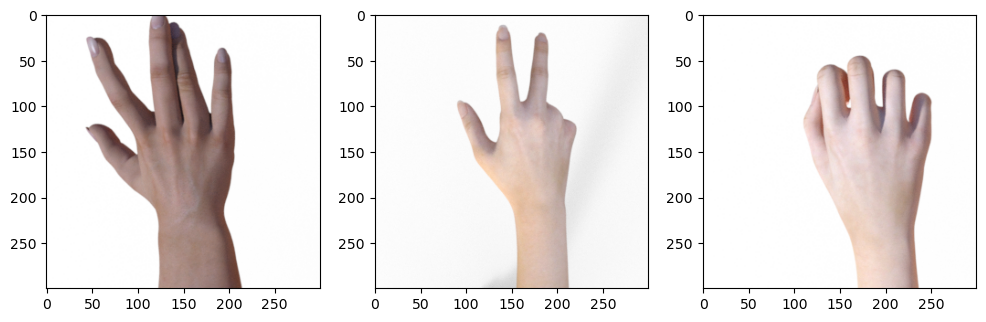

In [3]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

paper_pix = [os.path.join("rps/paper", fname) 
                for fname in os.listdir("rps/paper")[ pic_index-1:pic_index] 
               ]

scissor_pix = [os.path.join("rps/scissors", fname) 
                for fname in os.listdir("rps/scissors")[ pic_index-1:pic_index]
               ]               
rock_pix = [os.path.join("rps/rock", fname) 
                for fname in os.listdir("rps/rock")[ pic_index-1:pic_index]
               ]               

for i, img_path in enumerate(paper_pix+scissor_pix+rock_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('On') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [4]:
#splittin
splitfolders.ratio('rps', output="modul3", seed=1337, ratio=(.7, 0.25,0.05)) 

Copying files: 2520 files [00:40, 61.76 files/s]


In [5]:
print('train paper', len(os.listdir('modul3/train/paper')))
print('train rock', len(os.listdir('modul3/train/rock')))
print('train scissors', len(os.listdir('modul3/train/scissors')))

print('-------------------------')
print('evaluation paper', len(os.listdir('modul3/val/paper')))
print('evaluation rock', len(os.listdir('modul3/val/rock')))
print('evaluation scissors', len(os.listdir('modul3/val/paper')))

print('-------------------------')
print('test paper', len(os.listdir('modul3/test/paper')))
print('test rock', len(os.listdir('modul3/test/rock')))
print('test scissors', len(os.listdir('modul3/test/scissors')))

train paper 588
train rock 588
train scissors 588
-------------------------
evaluation paper 210
evaluation rock 210
evaluation scissors 210
-------------------------
test paper 42
test rock 42
test scissors 42


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = 'modul3/train'
validation_dir = 'modul3/val'
test_dir = 'modul3/test'

# Prepocessin
datagen = ImageDataGenerator(
                rescale=1./255,
                rotation_range=20,
                horizontal_flip=True,
                shear_range = 0.2,
                fill_mode = 'nearest',
                validation_split=0.4)

train_generator = datagen.flow_from_directory(train_dir,
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))     


validation_generator = datagen.flow_from_directory(validation_dir,
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))     

test_generator =  datagen.flow_from_directory(test_dir,
                                                         batch_size=32,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 1764 images belonging to 3 classes.
Found 630 images belonging to 3 classes.
Found 126 images belonging to 3 classes.


In [7]:
model = tf.keras.models.Sequential([
     tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 16)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 74, 74, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 16)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 36, 36, 16)        0

In [10]:
# Compiling Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
history = model.fit( train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
56/56 [==============================] - 67s 1s/step - loss: 0.0963 - accuracy: 0.9649 - val_loss: 0.0467 - val_accuracy: 0.9889
Epoch 2/10
56/56 [==============================] - 68s 1s/step - loss: 0.0614 - accuracy: 0.9796 - val_loss: 0.0280 - val_accuracy: 0.9937
Epoch 3/10
56/56 [==============================] - 66s 1s/step - loss: 0.0595 - accuracy: 0.9824 - val_loss: 0.0275 - val_accuracy: 0.9952
Epoch 4/10
56/56 [==============================] - 66s 1s/step - loss: 0.0668 - accuracy: 0.9813 - val_loss: 0.0243 - val_accuracy: 0.9984
Epoch 5/10
56/56 [==============================] - 66s 1s/step - loss: 0.0509 - accuracy: 0.9830 - val_loss: 0.0238 - val_accuracy: 0.9952
Epoch 6/10
56/56 [==============================] - 65s 1s/step - loss: 0.0509 - accuracy: 0.9802 - val_loss: 0.0120 - val_accuracy: 0.9968
Epoch 7/10
56/56 [==============================] - 69s 1s/step - loss: 0.0336 - accuracy: 0.9864 - val_loss: 0.0113 - val_accuracy: 0.9984
Epoch 8/10
56/56 [==

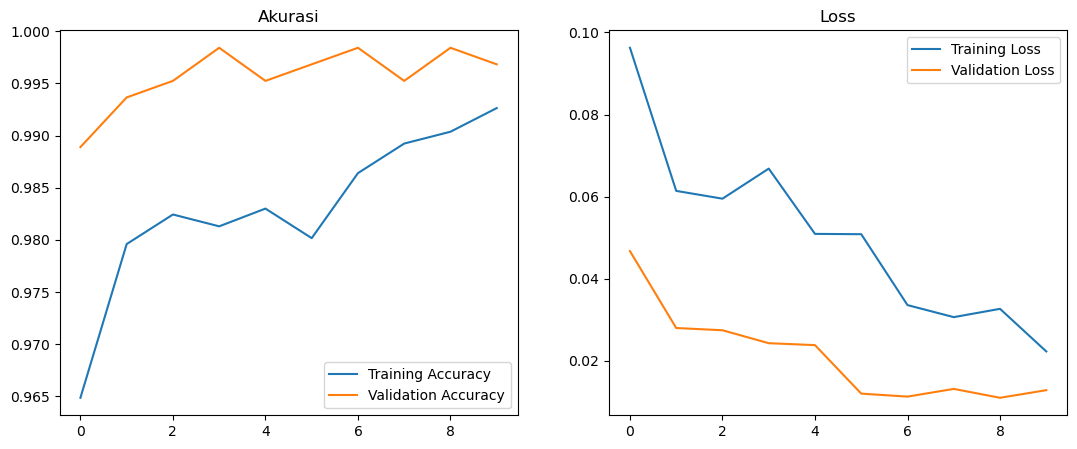

In [16]:
# Visualization Accuracy, Val Accuracy, Loss and Val Loss
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(13, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Akurasi')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

In [17]:
# Memperoleh prediksi probabilitas untuk setiap sampel dalam dataset validasi
y_pred = model.predict(validation_generator)

# Mengambil indeks kelas dengan probabilitas tertinggi untuk setiap sampel
y_pred_classes = np.argmax(y_pred, axis=1)

# Mengambil indeks kelas sebenarnya dari dataset validasi
true_classes = validation_generator.classes

# Mendapatkan nama kelas dari indeks kelas
class_labels = list(validation_generator.class_indices.keys())

# Menampilkan classification report
print(classification_report(true_classes, y_pred_classes, target_names=class_labels))

20/20 [==============================] - 15s 718ms/step
              precision    recall  f1-score   support

       paper       0.32      0.31      0.32       210
        rock       0.34      0.34      0.34       210
    scissors       0.35      0.35      0.35       210

    accuracy                           0.33       630
   macro avg       0.33      0.33      0.33       630
weighted avg       0.33      0.33      0.33       630



In [18]:
model.save('model5.h5')

C:\Users\DELL\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [20]:
from keras.models import load_model
model = load_model('model5.h5')

In [21]:
def load_and_preprocess_images(folder, label, num_images=10):
    image_paths = [os.path.join(folder, file) for file in os.listdir(folder)]
    random.shuffle(image_paths)
    images = []
    labels = []
    
    for i, image_path in enumerate(image_paths):
        if i >= num_images:
            break
        
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB format
        image = cv2.resize(image, (150, 150))  # Resize the image to match your model input size
        image = image / 255.0  # Normalize pixel values to [0, 1]
        
        images.append(image)
        
        # Extract the label from the folder name
        labels.append(label)
    
    return np.array(images), labels

In [24]:
import cv2
import random
num_images = 4
rock_images, rock_labels = load_and_preprocess_images('./modul3/test/rock', 'rock', num_images)
paper_images, paper_labels = load_and_preprocess_images('modul3/test/paper', 'paper', num_images)
scissors_images, scissors_labels = load_and_preprocess_images('modul3/test/scissors', 'scissors', num_images)

In [25]:
images = np.vstack((rock_images, paper_images, scissors_images))
true_labels = rock_labels + paper_labels + scissors_labels
predictions = model.predict(images)
label_mapping = {0: "paper", 1: "rock", 2: "scissor"}
predicted_labels = [label_mapping[np.argmax(prediction)] for prediction in predictions]

1/1 [==============================] - 0s 300ms/step


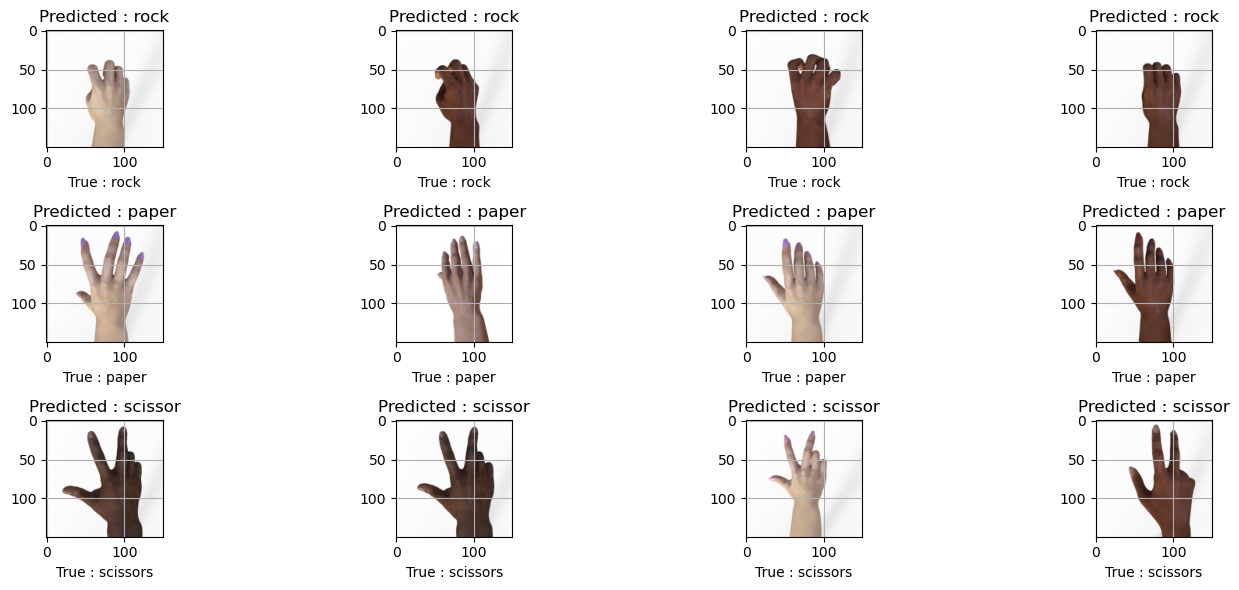

In [26]:

plt.figure(figsize=(15, 6))
for i in range(num_images * 3):
    plt.subplot(3, num_images, i + 1)
    plt.tight_layout()
    plt.imshow(images[i])
    plt.title(f"Predicted : {predicted_labels[i]}")
    plt.xlabel(f"True : {true_labels[i]}")
    plt.grid(visible=None)

plt.show()